In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [10]:
EPOCHS = 10
IMG_WIDTH = 30
IMG_HEIGHT = 30
NUM_CATEGORIES = 43
TEST_SIZE = 0.4
filename = "traffic.h5"
data_dir = r"traffic_signs"

In [11]:
def load_data(data_dir):
   # loading data and labels
    images = []
    labels = []
    classes = []
    
    # joining data_dir path and folder paths
    for dir in os.listdir(data_dir):
        folder = os.path.join(data_dir, dir)
        classes.append(dir)
        # message
        if os.path.isdir(folder):
            print(f"Loading files from {folder}")
        
        # looking for images in folders
        for file in os.listdir(folder):
            # reading and resizing images
            img = cv.imread(os.path.join(folder, file))
            img = cv.resize(img, (IMG_WIDTH, IMG_HEIGHT))
            
            # appending lists
            images.append(img)
            labels.append(int(dir))
            
    # returning lists        
    return images, labels, classes

In [17]:
def get_model():
    # defining model
    model = tf.keras.models.Sequential([
        
        # adding convolutional layer with 32 filters by 3x3 kernal
        tf.keras.layers.Conv2D(32, (3,3), activation="sigmoid", input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
        
        # adding max_pooling layer with pool size 2x2 with 45% dropout
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.45),
        
        # flattening all the units with dropout with 30%
        tf.keras.layers.Flatten(),
        
        # adding hidden layer with 128 units with 50% dropout
        tf.keras.layers.Dense(256, activation="sigmoid"),
        tf.keras.layers.Dropout(0.5),
        
        # adding output layer with 10 units to get probablity for 10 digits with softmax activation fn
        tf.keras.layers.Dense(NUM_CATEGORIES, activation="softmax")
    ])
    
    # compiling model
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    # getting model summary
    model.summary()
    return model

In [18]:
# getting data
images, labels, classes = load_data(data_dir)

# converting integer labeles to binary matrices to use categorical_crossentropy loss fn
labels = tf.keras.utils.to_categorical(labels)

# performing train test split
x_train, x_test, y_train, y_test =  train_test_split(np.array(images), np.array(labels), test_size=TEST_SIZE)

Loading files from traffic_signs\0
Loading files from traffic_signs\1
Loading files from traffic_signs\10
Loading files from traffic_signs\11
Loading files from traffic_signs\12
Loading files from traffic_signs\13
Loading files from traffic_signs\14
Loading files from traffic_signs\15
Loading files from traffic_signs\16
Loading files from traffic_signs\17
Loading files from traffic_signs\18
Loading files from traffic_signs\19
Loading files from traffic_signs\2
Loading files from traffic_signs\20
Loading files from traffic_signs\21
Loading files from traffic_signs\22
Loading files from traffic_signs\23
Loading files from traffic_signs\24
Loading files from traffic_signs\25
Loading files from traffic_signs\26
Loading files from traffic_signs\27
Loading files from traffic_signs\28
Loading files from traffic_signs\29
Loading files from traffic_signs\3
Loading files from traffic_signs\30
Loading files from traffic_signs\31
Loading files from traffic_signs\32
Loading files from traffic_signs

In [19]:
# getting model
model = get_model()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               1605888   
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                      

In [20]:
# training model
history = model.fit(x_train, y_train, epochs=EPOCHS, validation_data=(x_test,  y_test))

Epoch 1/10
500/500 [==============================] - 9s 17ms/step - loss: 2.1812 - accuracy: 0.4252 - val_loss: 0.6856 - val_accuracy: 0.8557
Epoch 2/10
500/500 [==============================] - 9s 17ms/step - loss: 0.6239 - accuracy: 0.8358 - val_loss: 0.2647 - val_accuracy: 0.9545
Epoch 3/10
500/500 [==============================] - 8s 17ms/step - loss: 0.3575 - accuracy: 0.9078 - val_loss: 0.1532 - val_accuracy: 0.9704
Epoch 4/10
500/500 [==============================] - 8s 17ms/step - loss: 0.2491 - accuracy: 0.9374 - val_loss: 0.1073 - val_accuracy: 0.9800
Epoch 5/10
500/500 [==============================] - 8s 17ms/step - loss: 0.1922 - accuracy: 0.9506 - val_loss: 0.1121 - val_accuracy: 0.9739
Epoch 6/10
500/500 [==============================] - 9s 17ms/step - loss: 0.1752 - accuracy: 0.9519 - val_loss: 0.0888 - val_accuracy: 0.9791
Epoch 7/10
500/500 [==============================] - 9s 17ms/step - loss: 0.1417 - accuracy: 0.9628 - val_loss: 0.0679 - val_accuracy: 0.9847

333/333 - 1s - loss: 0.0554 - accuracy: 0.9864 - 1s/epoch - 4ms/step


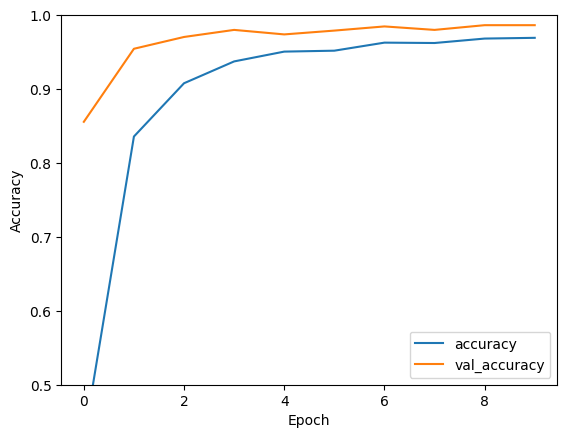

In [21]:
# plotting evaluation graph
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluating the model
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [22]:
# saving the model
model.save(filename)
print(f"Model saved to {filename}.")

Model saved to traffic.h5.


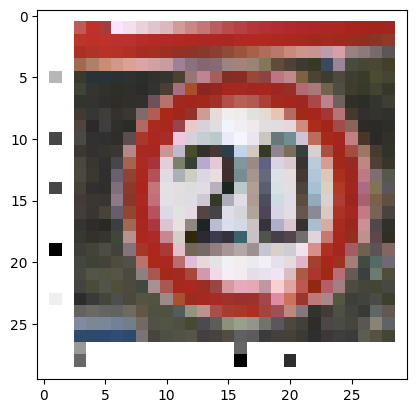

(30, 30, 3)


In [23]:
# loading saved model
loaded_model = tf.keras.models.load_model(r"traffic.h5")
img = cv.imread(r"test_img.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.resize(img, (30, 30))
plt.imshow(img)
plt.show()
print(img.shape)

In [24]:
img = np.expand_dims(img, axis=0)
prediction = loaded_model.predict(img)
prediction = classes[np.argmax(prediction)]
print(prediction)

1/1 [==============================] - 0s 126ms/step
7


In [25]:
# creating a function to preprocess test image and give predictions
def predict(image):
    # preprocessing
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image = cv.resize(image, (30, 30))
    image = np.expand_dims(image, axis=0)
    prediction = loaded_model.predict(image)
    # getting the highest probablity
    prediction = classes[np.argmax(prediction)]
    
    return prediction

In [26]:
test_image = cv.imread(r"test_img.png")
print("Prediction:", predict(test_image))

1/1 [==============================] - 0s 29ms/step
Prediction: 7
